#### Problem Statement


Given a customer's credit card transaction history, the goal is to predict which customers are likely to default on their credit card payments in the upcoming months. A credit card is a type of payment card that allows the user to make purchases on credit, with the balance due each month. If a customer fails to make payments on their credit card for an extended period, they may become severely delinquent and default on their payments.

It's important to note that missing one or two credit card payments does not necessarily count as a default. Typically, a payment default occurs when a customer fails to pay the minimum amount due on their credit card for a few consecutive months. Once a default occurs, it can negatively impact the customer's credit score and may result in additional fees and charges being applied to the account. Therefore, accurately predicting which customers are at risk of defaulting on their credit card payments can be crucial for financial institutions to manage risk and make informed decisions about lending and credit offers.

DATASET

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.

Importing the libraries

In [38]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC

#### Importing the dataset


In [25]:
df=pd.read_csv("UCI_Credit_Card.csv")

#### Splitting dataset into train and test 

In [26]:
df.set_index("ID", inplace=True)
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)
df.rename(columns={'default.payment.next.month':'Nonpayer'},inplace=True)
df_train,df_test=train_test_split(df)


In [27]:
df.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Nonpayer
ID,,,,,,,,,,,,,,,,,,,,,
3487,130000.0,2,2,2,25,-1,-1,-1,0,0,...,23150.0,27376.0,33104.0,780.0,36659.0,5000.0,5000.0,7000.0,5000.0,0
1323,360000.0,2,1,1,42,0,0,0,0,0,...,189455.0,194373.0,207022.0,10005.0,20117.0,15018.0,10027.0,20057.0,17000.0,0
17035,10000.0,2,2,1,24,0,0,0,0,0,...,9533.0,9692.0,9829.0,1142.0,1159.0,1140.0,692.0,829.0,1000.0,1
12890,260000.0,1,2,2,44,0,0,0,0,0,...,52681.0,53852.0,55967.0,2259.0,2000.0,2000.0,2000.0,3000.0,1681.0,0
27549,150000.0,1,3,1,52,2,2,2,2,2,...,47214.0,144862.0,148153.0,13312.0,2305.0,0.0,98828.0,4241.0,3625.0,1


#### data preprocessing 1. finiding out missing values


In [28]:
df_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Nonpayer
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,167345.230222,1.603822,1.851689,1.553156,35.438844,-0.018622,-0.130978,-0.164311,-0.219111,-0.264533,...,43244.735689,40243.472178,38746.832756,5681.336622,5.878085e+03,5262.123378,4807.165067,4683.988978,5261.058533,0.220267
std,129292.691900,0.489113,0.787590,0.520926,9.180175,1.120049,1.197376,1.197645,1.168839,1.130718,...,64265.850853,60877.218870,59677.048936,16884.540966,2.066378e+04,17953.790810,15924.230381,14290.534966,18145.553771,0.414436
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2375.750000,1761.500000,1230.000000,1000.000000,7.920000e+02,390.000000,280.000000,241.000000,116.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19033.500000,18059.500000,16787.500000,2101.500000,2.007000e+03,1801.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54400.250000,50069.750000,48990.250000,5009.000000,5.000000e+03,4541.250000,4008.000000,4017.500000,4013.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,332000.000000,528666.000000,1.000000


 describe method says the calulations of numerical column and we can see the description
 
 Above we can see:the limit balance to be maintained is 1000.

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 2952 to 23812
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  22500 non-null  float64
 1   SEX        22500 non-null  int64  
 2   EDUCATION  22500 non-null  int64  
 3   MARRIAGE   22500 non-null  int64  
 4   AGE        22500 non-null  int64  
 5   PAY_1      22500 non-null  int64  
 6   PAY_2      22500 non-null  int64  
 7   PAY_3      22500 non-null  int64  
 8   PAY_4      22500 non-null  int64  
 9   PAY_5      22500 non-null  int64  
 10  PAY_6      22500 non-null  int64  
 11  BILL_AMT1  22500 non-null  float64
 12  BILL_AMT2  22500 non-null  float64
 13  BILL_AMT3  22500 non-null  float64
 14  BILL_AMT4  22500 non-null  float64
 15  BILL_AMT5  22500 non-null  float64
 16  BILL_AMT6  22500 non-null  float64
 17  PAY_AMT1   22500 non-null  float64
 18  PAY_AMT2   22500 non-null  float64
 19  PAY_AMT3   22500 non-null  float64
 20  PAY

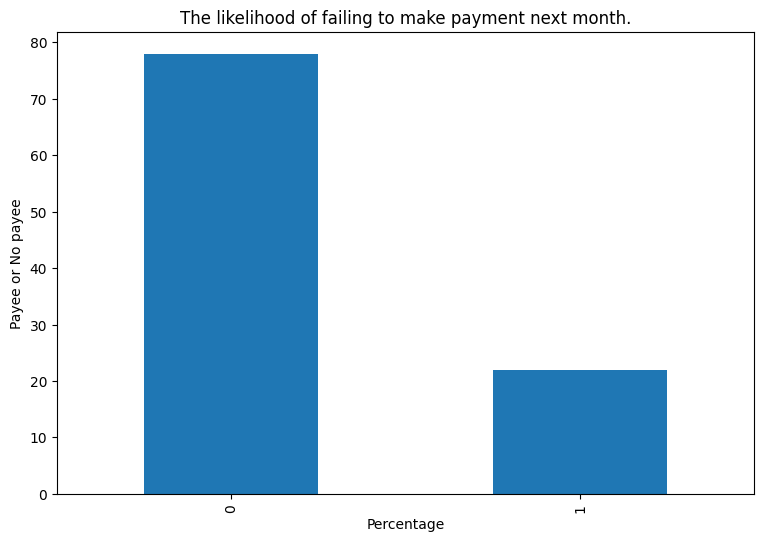

In [45]:
segment = (df_train["Nonpayer"].value_counts(normalize=True) * 100)
ax = segment.plot(kind="bar", figsize=(9, 6))
ax.set_title("The likelihood of failing to make payment next month.")
ax.set_xlabel("Percentage")
ax.set_ylabel("Payee or No payee")

plt.show()


In [33]:
df_train['SEX'].value_counts()

2    13586
1     8914
Name: SEX, dtype: int64

SEX: Gender (1 = male, 2 = female)

In [34]:
df_train['AGE'].value_counts()

29    1229
27    1093
30    1063
28    1055
26     965
31     919
25     882
34     871
32     850
33     844
35     835
24     834
36     817
37     785
38     732
39     728
23     701
40     672
42     603
41     598
44     533
43     498
45     475
22     428
46     425
47     368
48     354
49     329
50     293
53     246
51     245
52     220
54     183
55     158
56     132
58      94
57      88
59      60
21      53
60      47
61      39
62      31
63      25
64      20
66      19
65      13
67      13
69       9
70       8
68       5
71       3
72       3
75       3
73       2
74       1
79       1
Name: AGE, dtype: int64

In [36]:
df_train['EDUCATION'].value_counts()

2    10553
1     7932
3     3671
5      208
4       89
6       36
0       11
Name: EDUCATION, dtype: int64

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

In [29]:
df_train.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Nonpayer     0
dtype: int64

#### split the train, test value to features and target variables

In [30]:
x_train=df_train.drop("Nonpayer",axis=1)
y_train=df_train["Nonpayer"]
x_test=df_test.drop("Nonpayer",axis=1)
y_test=df_test["Nonpayer"]

print("x_train size :",x_train.shape)
print("y_train size :",y_train.shape)
print("x_test size : ",x_test.shape)
print("y_test size : ",y_test.shape)

x_train size : (22500, 23)
y_train size : (22500,)
x_test size :  (7500, 23)
y_test size :  (7500,)


### Feature engineering

#### Standization

In [8]:
# svm give a good accuracy over the standarided data with mean =0 and variance=1

In [31]:
#constructing Standardization model
stnd=StandardScaler()
X_train_scaled = stnd.fit_transform(x_train)
X_test_scaled = stnd.transform(x_test)

# train the SVM model



In [10]:
parameters_grid={}